In [1]:
from matplotlib import pyplot as plt

template = 'log/%s_%d/log.txt'
sizes = [500, 1000, 5000, 10000, 50000]
reg_types = ['elbo', 'elbo_anneal', 'mmd']
c_list = ['r', 'g', 'b']
values = []

for reg_type in reg_types:
    values.append(dict())
    for size in sizes:
        reader = open(template % (reg_type, size), 'r')
        while True:
            line = reader.readline().split()
            if len(line) < 3:
                break
            if str(line[0]) not in values[-1]:
                values[-1][str(line[0])] = [[size], [float(line[1])]]
            else:
                values[-1][str(line[0])][0].append(size)
                values[-1][str(line[0])][1].append(float(line[1]))

In [2]:
def plot(name):
    plt.title(name)
    for index, reg_type in enumerate(reg_types):
        plt.plot(values[index][name][0], values[index][name][1], c=c_list[index], label=reg_type, hold=True)
    plt.legend()
    plt.show()

In [3]:
vars = ['mmd', 'nll', 'elbo', 'xlogdet', 'zlogdet', 'zlogdet_train', 'zlogdet_test']

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3315: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


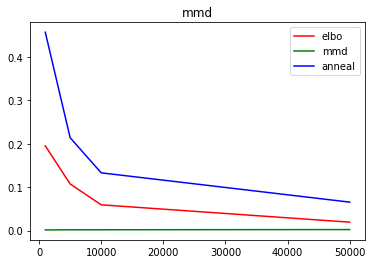

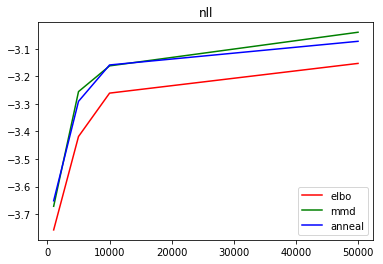

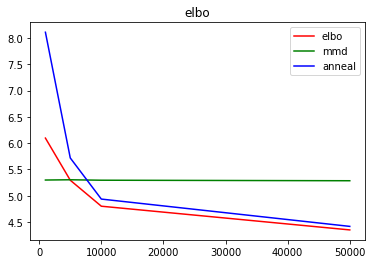

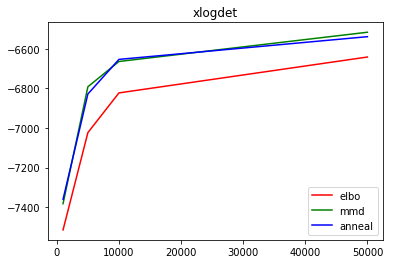

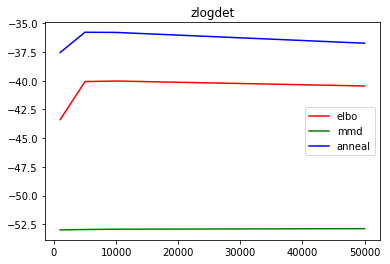

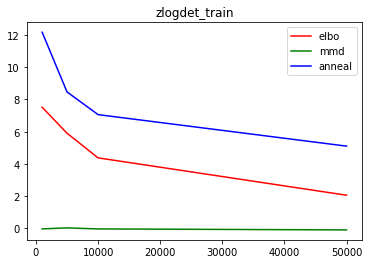

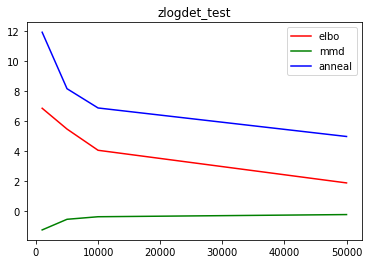

In [4]:
for name in vars:
    plot(name)

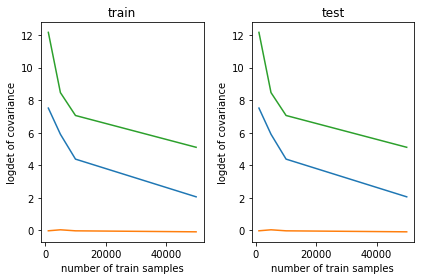

In [16]:
fig, ax = plt.subplots(1, 2)
names = ['elbo', 'elbo_anneal', 'mmd']
for index, name in enumerate(names):
    ax[0].plot(values[index]['zlogdet_train'][0], values[index]['zlogdet_train'][1], lw=3, label=name)
ax[0].set_ylabel('logdet of covariance', fontsize=14)
ax[0].set_xlabel('number of train samples', fontsize=14)
ax[0].set_title('train', fontsize=18)
ax[0].set_ylim([-1.5, 10])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for index, name in enumerate(names):
    ax[1].plot(values[index]['zlogdet_test'][0], values[index]['zlogdet_test'][1], lw=3, label=name)
ax[1].set_ylabel('logdet of covariance', fontsize=14)   
ax[1].set_xlabel('number of train samples', fontsize=14)
ax[1].set_title('test', fontsize=18)
ax[1].set_ylim([-1.5, 10])
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax[1].legend(loc=1, fontsize=16)
fig.set_size_inches(10.5, 5.5)
plt.tight_layout(w_pad=0.1, h_pad=0.5)
plt.savefig('/Users/shengjiazhao/Projects/InfoVAE/plots/elbo_vs_mmd_logdet.png')
plt.show()

In [ ]:
values[0]